Topic 5.7  |  提取等高线坐标
# 提取等高线坐标
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex, symbols
x1, x2 = symbols('x1 x2')
# 导入符号变量
import os

from matplotlib import cm
# 导入色谱模块

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [3]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

### 1. 定义符号函数

In [4]:
# 用 sympy 库定义 MATLAB二元函数 peaks()
f_x1x2 =  3*(1-x1)**2*exp(-(x1**2) - (x2+1)**2)\
    - 10*(x1/5 - x1**3 - x2**5)*exp(-x1**2-x2**2)\
    - 1/3*exp(-(x1+1)**2 - x2**2) 

f_x1x2_fcn = lambdify([x1,x2],f_x1x2)
# 将符号函数表达式转换为Python函数
xx1, xx2 = mesh(num = 201)
ff = f_x1x2_fcn(xx1, xx2)
# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

In [5]:
f_x1x2

3*(1 - x1)**2*exp(-x1**2 - (x2 + 1)**2) - (-10*x1**3 + 2*x1 - 10*x2**5)*exp(-x1**2 - x2**2) - 0.333333333333333*exp(-x2**2 - (x1 + 1)**2)

### 2. 计算 $f(x_1,x_2)$ 对 $x_1$ 一阶偏导  
$$
   \frac{\partial f(x_1,x_2)}{\partial x_1}
$$

In [6]:
df_dx1 = f_x1x2.diff(x1)
df_dx1_fcn = lambdify([x1,x2],df_dx1)
df_dx1_zz = df_dx1_fcn(xx1,xx2)

In [7]:
df_dx1

-6*x1*(1 - x1)**2*exp(-x1**2 - (x2 + 1)**2) - 2*x1*(10*x1**3 - 2*x1 + 10*x2**5)*exp(-x1**2 - x2**2) - 0.333333333333333*(-2*x1 - 2)*exp(-x2**2 - (x1 + 1)**2) + (6*x1 - 6)*exp(-x1**2 - (x2 + 1)**2) + (30*x1**2 - 2)*exp(-x1**2 - x2**2)

### 3. 定位 $\frac{\partial f(x_1,x_2)}{\partial x_1}= 0$

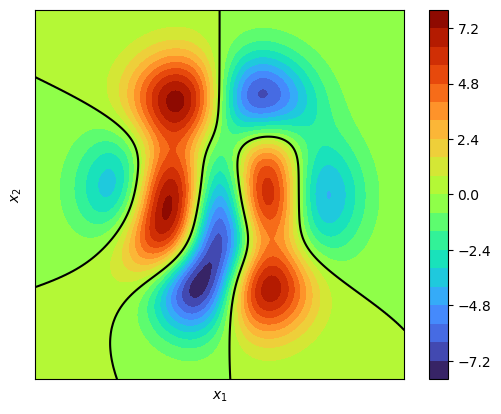

In [8]:
fig, ax = plt.subplots()

colorbar = ax.contourf(xx1, xx2, df_dx1_zz, 20, cmap='turbo')
ax.contour(xx1, xx2, df_dx1_zz, levels = [0],
           colors = 'k')
# 黑色线代表偏导为 0

fig.colorbar(colorbar, ax=ax)
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('Figures/对x1偏导.svg', format='svg')

### 4. 将 $\frac{\partial f(x_1,x_2)}{\partial x_1}= 0$ 映射到 $ f(x_1,x_2) $ 曲面上

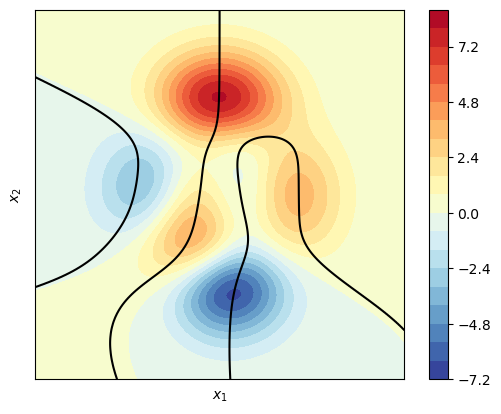

In [9]:
fig, ax = plt.subplots()

colorbar = ax.contourf(xx1, xx2, ff, 20, cmap='RdYlBu_r')
ax.contour(xx1, xx2, df_dx1_zz, levels = [0],
           colors = 'k')

fig.colorbar(colorbar, ax=ax)
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('Figures/对x1偏导为0映射到f(x1,x2).svg', format='svg')


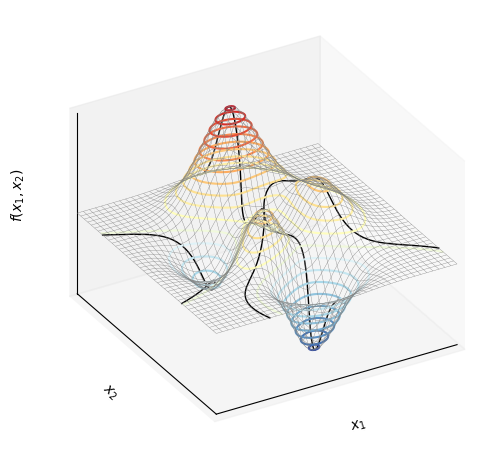

In [10]:


fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

CS_x = ax.contour(xx1, xx2, df_dx1_zz, levels = [0])
# 提取等高线
ax.cla()  

ax.plot_wireframe(xx1, xx2, ff,
                  color = [0.5,0.5,0.5],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

colorbar = ax.contour(xx1, xx2, ff,20,
             cmap = 'RdYlBu_r')

# 在 for 循环中，分别提取等高线数值
for i in range(0,len(CS_x.allsegs[0])):

    contour_points_x_y = CS_x.allsegs[0][i]
    
    # 计算黑色等高线对应的 f(x1,x2) 值
    contour_points_z = f_x1x2_fcn(contour_points_x_y[:,0],
                                contour_points_x_y[:,1])
    
    # 绘制映射结果
    ax.plot3D(contour_points_x_y[:,0],
              contour_points_x_y[:,1], 
              contour_points_z,
              color = 'k',
              linewidth = 1)
    
ax.set_proj_type('ortho')

ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

ax.view_init(azim=-120, elev=30)
# ax.view_init(azim=-135, elev=60)
plt.tight_layout()
ax.grid(False)
fig.savefig('Figures/对x1偏导为0映射到f(x1,x2)，三维曲面.svg', format='svg')

### 5. 计算 $f(x_1,x_2)$ 对 $x_2$ 一阶偏导  
$$
   \frac{\partial f(x_1,x_2)}{\partial x_2}
$$

In [11]:
df_dx2 = f_x1x2.diff(x2)
df_dx2_fcn = lambdify([x1,x2],df_dx2)
df_dx2_zz = df_dx2_fcn(xx1,xx2)

In [12]:
df_dx2

50*x2**4*exp(-x1**2 - x2**2) - 2*x2*(10*x1**3 - 2*x1 + 10*x2**5)*exp(-x1**2 - x2**2) + 0.666666666666667*x2*exp(-x2**2 - (x1 + 1)**2) + 3*(1 - x1)**2*(-2*x2 - 2)*exp(-x1**2 - (x2 + 1)**2)

$$
   \frac{\partial f(x,y)}{\partial y}=0
$$

### 6. 定位 $\frac{\partial f(x_1,x_2)}{\partial x_2}= 0$

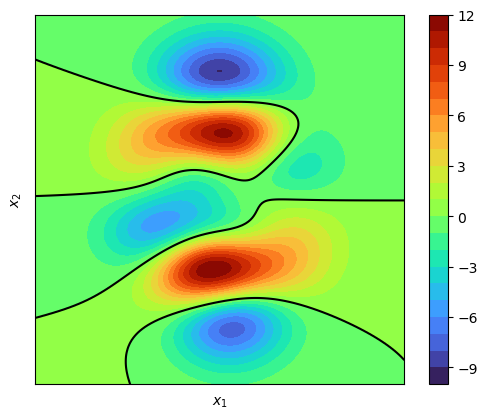

In [13]:
fig, ax = plt.subplots()

colorbar = ax.contourf(xx1, xx2, df_dx2_zz, 20, cmap='turbo')
ax.contour(xx1, xx2, df_dx2_zz, levels = [0],
           colors = 'k')
# 黑色线代表偏导为 0

fig.colorbar(colorbar, ax=ax)
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('Figures/对x2偏导.svg', format='svg')

### 7. 将 $\frac{\partial f(x_1,x_2)}{\partial x_2}= 0$ 映射到 $ f(x_1,x_2) $ 曲面上

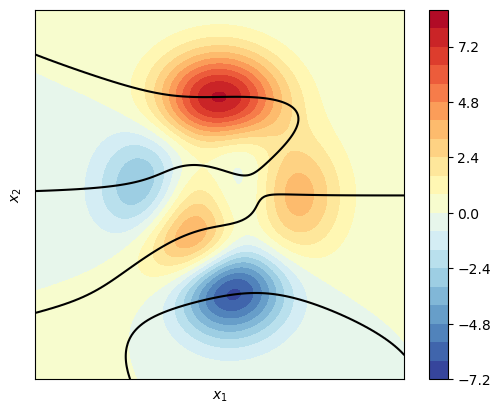

In [14]:
fig, ax = plt.subplots()

colorbar = ax.contourf(xx1, xx2, ff, 20, cmap='RdYlBu_r')
ax.contour(xx1, xx2, df_dx2_zz, levels = [0],
           colors = 'k')

fig.colorbar(colorbar, ax=ax)
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('Figures/对x2偏导为0映射到f(x1,x2).svg', format='svg')


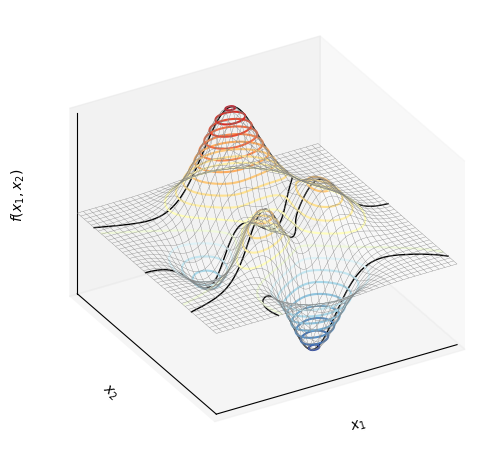

In [15]:


fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

CS_x = ax.contour(xx1, xx2, df_dx2_zz, levels = [0])
# 提取等高线
ax.cla()  

ax.plot_wireframe(xx1, xx2, ff,
                  color = [0.5,0.5,0.5],
                  rstride=5, cstride=5,
                  linewidth = 0.25)

colorbar = ax.contour(xx1, xx2, ff,20,
             cmap = 'RdYlBu_r')

# 在 for 循环中，分别提取等高线数值
for i in range(0,len(CS_x.allsegs[0])):

    contour_points_x_y = CS_x.allsegs[0][i]
    
    # 计算黑色等高线对应的 f(x1,x2) 值
    contour_points_z = f_x1x2_fcn(contour_points_x_y[:,0],
                                contour_points_x_y[:,1])
    
    # 绘制映射结果
    ax.plot3D(contour_points_x_y[:,0],
              contour_points_x_y[:,1], 
              contour_points_z,
              color = 'k',
              linewidth = 1)
    
ax.set_proj_type('ortho')

ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')

ax.view_init(azim=-120, elev=30)
# ax.view_init(azim=-135, elev=60)
plt.tight_layout()
ax.grid(False)
fig.savefig('Figures/对x2偏导为0映射到f(x1,x2)，三维曲面.svg', format='svg')

In [16]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023